In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import calculation_functions as cf

In [2]:
# building parameters
thickness = cf.thickness
length = cf.length
height = cf.height
setup_height = cf.setup_height

In [3]:
def our_plot(x, y, title, xlabel, ylabel, labels=[' '],xmin=0, xmax=90):
    plt.figure(figsize=(6.7, 6))  # (width, height in inches)

    color = ['b', 'orange', 'green']
    for i in range(len(y)):
        plt.plot(x, y[i], label=labels[i], color=color[i], linewidth = 2)
    
    plt.title(title, fontsize=14)#, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    
    plt.xlim(xmin, xmax)
    #plt.ylim(0, 7e6)
    
    # plt.xticks(np.arange(0, 11, 2))  # Set x-ticks at 0, 2, 4, 6, 8, 10
    # plt.yticks(np.arange(0, 9, 1))   # Set y-ticks at 0, 1, 2, ... 8
    
    plt.tick_params(axis='both', which='major', labelsize=10, direction='in')

    plt.legend(loc='upper right', fontsize=10)

    
    # plt.legend(loc='upper right', fontsize=10)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    
    plt.show()

# Plots

### Pathlength

In [4]:
ceiling = cf.ceil_b(thickness, height, setup_height)
t = cf.thetas(0, 90.5, 1)

tot_path = np.array([cf.total_path(theta, ceiling, length) for theta in t[1]])

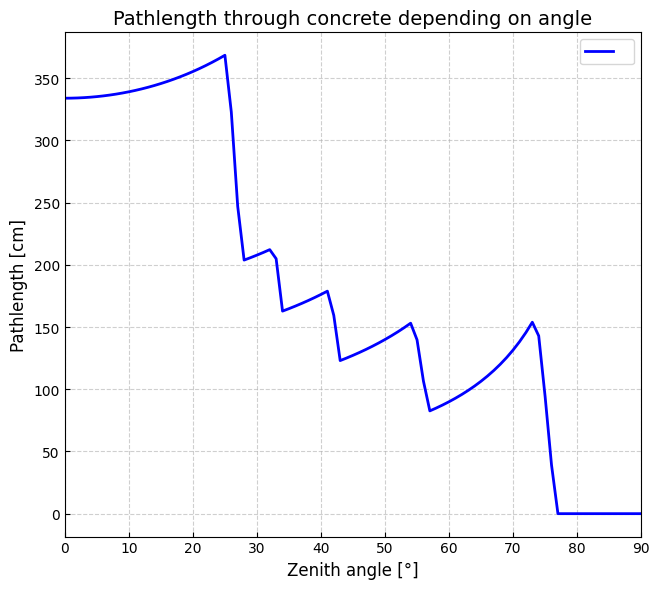

In [5]:
our_plot(t[0], np.array([tot_path]), 'Pathlength through concrete depending on angle', 'Zenith angle [°]', 'Pathlength [cm]')

### Calculate complete energy loss

$E_{loss} = \frac{dE}{dx} * \rho * l$

In [6]:
ceiling = cf.ceil_b(thickness, height, setup_height)
t = cf.thetas(0, 90.5, 1)

En_loss = np.array([cf.E_loss(theta, ceiling, length, cf.dEdx, cf.rho) for theta in t[1]])

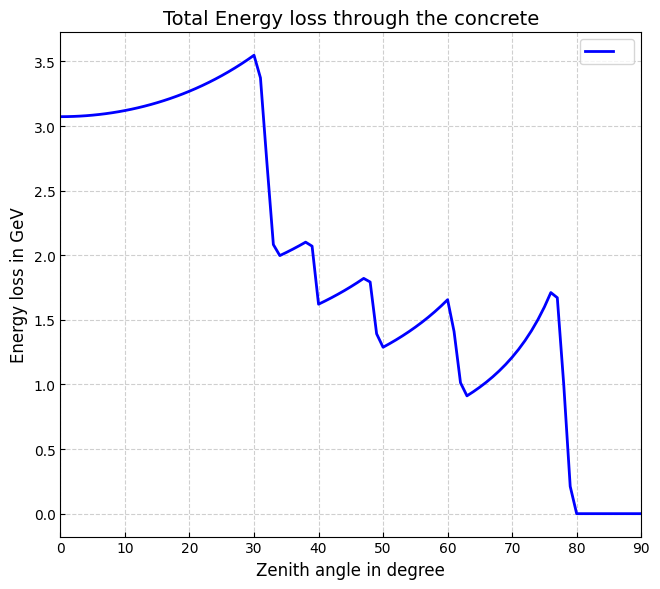

In [7]:
our_plot(t[0], np.array([En_loss]), 'Total Energy loss through the concrete', 'Zenith angle in degree', 'Energy loss in GeV')

### Calculate muon flux from Shukla equation

$I(E, \theta) = I_0 N (E_0 + E)^{-n} D(\theta)^{-(n-1)}$

$D_2(\theta) = \frac{1}{cos(\theta)}$

In [8]:
theta_starts = cf.thetas(0, 90, cf.binsize)
ceiling_b = cf.ceil_b(thickness, height, setup_height)
ceiling_3 = cf.ceil_3(thickness, height, setup_height)

In [9]:
I_3floor = np.array([cf.I_in(cf.mean_theta(theta), ceiling_3, length) for theta in theta_starts[1]])
I_3floor

array([38.00405375, 37.27014317, 35.83120704, 33.74395994, 31.09085891,
       27.97703054, 24.52627576, 20.87622695, 17.17273298, 13.56353315,
       10.19124487,  7.18561907,  4.65489797,  2.67592427,  1.58837128,
        1.82052465,  1.27960043,  0.18375763])

In [10]:
I_basement = np.array([cf.I_in(cf.mean_theta(theta), ceiling_b, length) for theta in theta_starts[1]])
I_basement

array([21.6691058 , 21.19228131, 20.2610959 , 18.91941191, 17.23038808,
       15.27339331, 19.16808746, 18.75781265, 18.716977  , 14.86040188,
       14.4548948 , 10.50532546, 10.08328987,  6.41361717,  3.52762263,
        1.82052465,  1.27960043,  0.18375763])

In [11]:
theta_samples = np.linspace(0, np.pi/2, 2000)

y_samples = np.array([cf.I_in_int(t, ceiling_3, length) for t in theta_samples])

result = simpson(y_samples, x=theta_samples)

print(f"Result 3rd floor: {result} Hz/m²")

Result 3rd floor: 66.99330013221643 Hz/m²


In [12]:
theta_samples = np.linspace(0, np.pi/2, 2000)

y_samples = np.array([cf.I_in_int(t, ceiling, length) for t in theta_samples])

result = simpson(y_samples, x=theta_samples)

print(f"Result inside: {result} Hz/m²")

Result inside: 62.76020842924533 Hz/m²


In [13]:
74/117.33

0.6306997357879486

In [14]:
32451/50980

0.6365437426441742

In [15]:
5/8

0.625

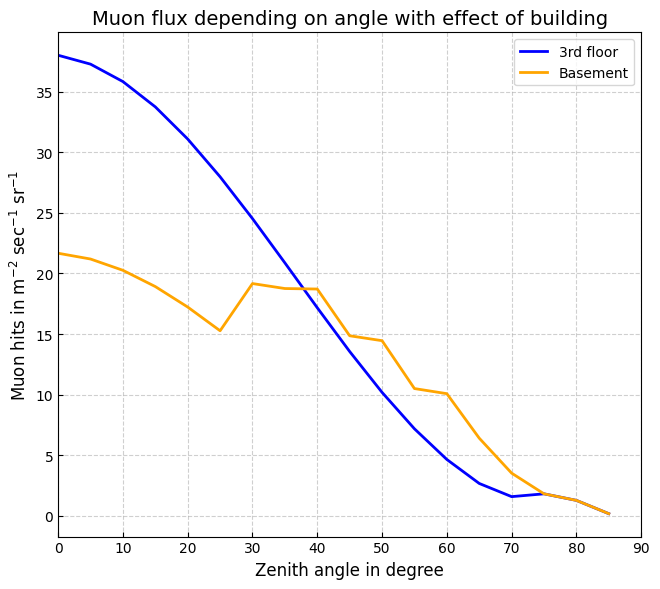

In [16]:
our_plot(theta_starts[0], np.array([I_3floor, I_basement]),
         'Muon flux depending on angle with effect of building',
         'Zenith angle in degree',
         r'Muon hits in $\text{m}^{-2} \text{ sec}^{-1} \text{ sr}^{-1}$',
         ['3rd floor', 'Basement'])

## Certain Angle Measurement

In [17]:
acc_angle = 26.6 # °
angle = np.deg2rad(acc_angle)
d_area = 0.1600 # m²
four_h = 4 * 60 * 60

In [18]:
basemuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_b, angle)
basemuons # Hz/m²

np.float64(12.37038487649022)

In [19]:
basemuons_s = basemuons * d_area
basemuons_s # Hz

np.float64(1.9792615802384352)

In [20]:
basemuons4 = basemuons_s * four_h
basemuons4

np.float64(28501.366755433468)

In [21]:
labmuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_1, angle)
labmuons

np.float64(16.20054548010522)

In [22]:
labmuons_s = labmuons * d_area
labmuons_s

np.float64(2.592087276816835)

In [23]:
labmuons4 = labmuons_s * four_h
labmuons4

np.float64(37326.05678616242)

In [24]:
topmuons = cf.muon_flux(thickness, height, setup_height, cf.ceil_3, angle)
topmuons

np.float64(22.099557244332853)

In [25]:
topmuons_s = topmuons * d_area
topmuons_s

np.float64(3.5359291590932567)

In [26]:
topmuons4 = topmuons_s * four_h
topmuons4

np.float64(50917.379890942895)

In [27]:
print("-1/3: ", basemuons4/topmuons4)
print("-1/1: ", basemuons4/labmuons4)
print("1/3: ", labmuons4/topmuons4)

-1/3:  0.5597571362956806
-1/1:  0.7635782938100105
1/3:  0.7330710430526675


In [28]:
print("-1/3: ", 32451/50930)
print("-1/1: ", 32451/37052)
print("1/3: ", 37052/50930)

-1/3:  0.6371686628706067
-1/1:  0.875823167440354
1/3:  0.7275083447869625


In [29]:
4499/8222

0.5471904646071516

In [30]:
32451/4/60/60

2.2535416666666666

In [31]:
37052/4/60/60

2.5730555555555554

In [32]:
50930/4/60/60

3.5368055555555555

## Calculate muon flux depending on wall thickness

In [33]:
cf.muon_flux(100, 250, 0)

np.float64(42.319432063090005)

In [34]:
t = np.arange(0, 200, 1)
flux_t = np.array([cf.muon_flux(thick, height, setup_height, cf.ceil_3, angle=np.deg2rad(26.6))*1600/10000*4*60*60 for thick in t])
flux_t

array([60643.63126084, 60398.48606554, 60154.81091914, 59912.59414092,
       59671.82416572, 59432.48954249, 59194.57893301, 58958.08111054,
       58722.98495848, 58489.27946914, 58256.95374238, 58025.99698445,
       57796.39850666, 57568.14772421, 57341.23415497, 57115.64741828,
       56891.37723378, 56668.41342025, 56446.74589448, 56226.36467012,
       56007.25985658, 55789.42165793, 55572.84037181, 55357.50638837,
       55143.41018921, 54930.54234635, 54718.89352117, 54508.45446344,
       54299.21601029, 54091.16908524, 53884.30469721, 53678.61393957,
       53474.08798919, 53270.7181055 , 53068.49562957, 52867.41198319,
       52667.45866799, 52468.62726451, 52270.90943138, 52074.29690442,
       51878.78149576, 51684.35509307, 51491.00965865, 51298.73722866,
       51107.52991229, 50917.37989094, 50728.27941748, 50540.22081542,
       50353.19647816, 50167.19886821, 49982.22051649, 49798.25402153,
       49615.29204875, 49433.32732977, 49252.35266166, 49072.36090626,
      

In [35]:
np.where(np.isclose(flux_t, 50917.37989094))

(array([45]),)

In [36]:
t.shape

(200,)

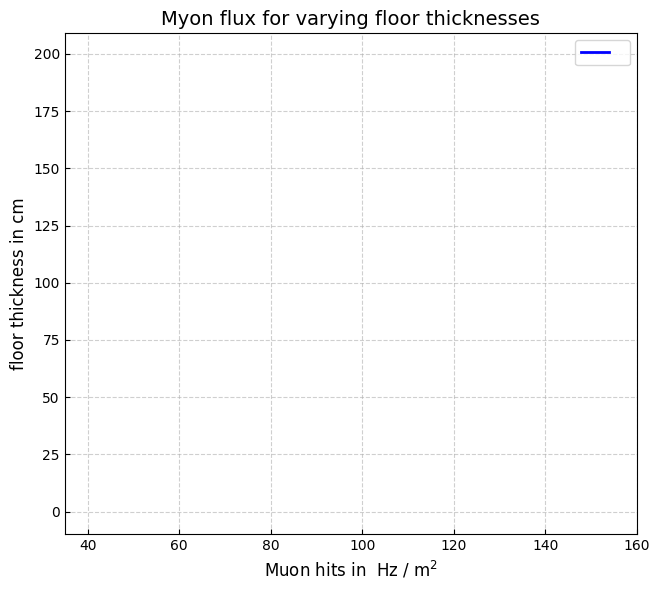

In [37]:
our_plot(flux_t, np.array([t]),
         'Myon flux for varying floor thicknesses',
         r'Muon hits in $\text{ Hz }/\text{ m}^{2}$',
         'floor thickness in cm',
        xmin=35,
        xmax=160)